## Experiments: Scalability Number of Series RSAST

In [2]:
import sys 
import os 
#add sast library path
file_path = os.path.dirname(os.getcwd())+"/sast"

#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.path.dirname(os.getcwd())+"\sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"/sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"\sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

#add cd_diagram library path
file_path = os.path.dirname(os.getcwd())+"\cd_diagram"

#file_path = r"C:\Users\Public\random_sast\cd_diagram"
sys.path.append(file_path)


file_path = os.path.dirname(os.getcwd())+"/cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"\cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"/cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

sys.path


['c:\\Users\\Nicolas R\\random_sast\\ExperimentationRSAST',
 'c:\\ProgramData\\Anaconda3\\python39.zip',
 'c:\\ProgramData\\Anaconda3\\DLLs',
 'c:\\ProgramData\\Anaconda3\\lib',
 'c:\\ProgramData\\Anaconda3',
 '',
 'C:\\Users\\Nicolas R\\AppData\\Roaming\\Python\\Python39\\site-packages',
 'c:\\ProgramData\\Anaconda3\\lib\\site-packages',
 'c:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32',
 'c:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'c:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'c:\\ProgramData\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Nicolas R\\.ipython',
 'c:\\Users\\Nicolas R\\random_sast/sast',
 'c:\\Users\\Nicolas R\\random_sast\\sast',
 'c:\\Users\\Nicolas R\\random_sast\\ExperimentationRSAST/sast',
 'c:\\Users\\Nicolas R\\random_sast\\ExperimentationRSAST\\sast',
 'c:\\Users\\Nicolas R\\random_sast\\cd_diagram',
 'c:\\Users\\Nicolas R\\random_sast/cd_diagram',
 'c:\\Users\\Nicolas R\\random_sast\\Experimentation

### Overall analysis

In [3]:
import time 
import os 
import gc
import numpy as np

import sys
sys.path.append(os.path.abspath("."))

from utils_sast import *
from sast import *

from sklearn.linear_model import RidgeClassifierCV

from sast import from_2d_array_to_nested
from sktime.classification.kernel_based import RocketClassifier
#from sktime.transformations.panel.shapelets import *

from sktime.datasets import load_UCR_UEA_dataset
from matplotlib.ticker import FuncFormatter
#from convst.classifiers import R_DST_Ridge
from aeon.classification.shapelet_based import RDSTClassifier

In [43]:
ds = 'Chinatown' # the dataset to use


#max_exponent = 20 # go up to series of length 2^max_exponent

max_exponent = 10 # go up to series of length 2^max_exponent

X_train_base, y_train_base = load_UCR_UEA_dataset(name=ds, extract_path='data', split="train", return_type="numpy2d")
X_test, y_test = load_UCR_UEA_dataset(name=ds, extract_path='data', split="test", return_type="numpy2d")
    
# fill na
#train_ds.fillna(0, axis=1, inplace=True)
#test_ds.fillna(0, axis=1, inplace=True)

#X_train_all, y_train = format_dataset(train_ds, shuffle=True)
#X_test_all, y_test_all = format_dataset(test_ds)

df_result = {}
list_score = []
list_time_fit = []
list_time_test = []
list_dataset = []
list_hyperparameter = []
list_method = []
list_rpoint = []
list_nb_per_class = []
list_number_series = []


solver_lr='lbfgs'

for i in range(4, max_exponent+1):

    nb_series = 2**i

    idx = np.random.choice(np.arange(len(y_train_base)), size=nb_series, replace=True)
    X_train = X_train_base[idx]
    y_train = y_train_base[idx]

    print('Shape:', X_train.shape)

    max_shp_length = X_train.shape[1]

    print("--number_series: 2^"+str(i))

    p=10
    k=1
    print("RSAST ACF&PACF: n_random_points="+str(p)+" nb_inst_per_class="+str(k))
    clf = LogisticRegression( solver=solver_lr)
    #clf = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10))
    start = time.time()
    
    rsast_ridge = RSAST(n_random_points=p,nb_inst_per_class=k, len_method="both", classifier=clf)
    rsast_ridge.fit(X_train, y_train)
    end = time.time()
    time_fit=end-start

    start = time.time()
    score=rsast_ridge.score(X_test, y_test) 
    end = time.time()
    time_test=end-start

    list_score.append(score)
    list_time_fit.append(time_fit)
    list_time_test.append(time_test)


    list_dataset.append(ds)
    list_hyperparameter.append("ACF&PACF: n_random_points="+str(p)+" nb_inst_per_class="+str(k))
    list_rpoint.append(str(p))
    list_nb_per_class.append(str(k))
    list_method.append("RSAST ACF&PACF")
    list_number_series.append(nb_series)

    p=30
    k=1
    print("RSAST ACF&PACF: n_random_points="+str(p)+" nb_inst_per_class="+str(k))
    clf = LogisticRegression( solver=solver_lr)
    #clf = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10))
    start = time.time()
    
    rsast_ridge = RSAST(n_random_points=p,nb_inst_per_class=k, len_method="both", classifier=clf)
    rsast_ridge.fit(X_train, y_train)
    end = time.time()

    time_fit=end-start

    start = time.time()
    score=rsast_ridge.score(X_test, y_test) 
    end = time.time()
    time_test=end-start

    list_score.append(score)
    list_time_fit.append(time_fit)
    list_time_test.append(time_test)

    list_dataset.append(ds)
    list_hyperparameter.append("ACF&PACF: n_random_points="+str(p)+" nb_inst_per_class="+str(k))
    list_rpoint.append(str(p))
    list_nb_per_class.append(str(k))
    list_method.append("RSAST ACF&PACF")
    list_number_series.append(nb_series)

    p=10
    k=10
    print("RSAST ACF&PACF: n_random_points="+str(p)+" nb_inst_per_class="+str(k))
    clf = LogisticRegression( solver=solver_lr)
    #clf = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10))
    start = time.time()
    
    rsast_ridge = RSAST(n_random_points=p,nb_inst_per_class=k, len_method="both", classifier=clf)
    rsast_ridge.fit(X_train, y_train)
    end = time.time()

    time_fit=end-start

    start = time.time()
    score=rsast_ridge.score(X_test, y_test) 
    end = time.time()
    time_test=end-start

    list_score.append(score)
    list_time_fit.append(time_fit)
    list_time_test.append(time_test)

    list_dataset.append(ds)
    list_hyperparameter.append("ACF&PACF: n_random_points="+str(p)+" nb_inst_per_class="+str(k))
    list_rpoint.append(str(p))
    list_nb_per_class.append(str(k))
    list_method.append("RSAST ACF&PACF")
    list_number_series.append(nb_series)

    p=30
    k=10
    print("RSAST ACF&PACF: n_random_points="+str(p)+" nb_inst_per_class="+str(k))
    clf = LogisticRegression( solver=solver_lr)
    #clf = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10))
    start = time.time()
    
    rsast_ridge = RSAST(n_random_points=p,nb_inst_per_class=k, len_method="both", classifier=clf)
    rsast_ridge.fit(X_train, y_train)
    end = time.time()

    time_fit=end-start

    start = time.time()
    score=rsast_ridge.score(X_test, y_test) 
    end = time.time()
    time_test=end-start

    list_score.append(score)
    list_time_fit.append(time_fit)
    list_time_test.append(time_test)

    list_dataset.append(ds)
    list_hyperparameter.append("ACF&PACF: n_random_points="+str(p)+" nb_inst_per_class="+str(k))
    list_rpoint.append(str(p))
    list_nb_per_class.append(str(k))
    list_method.append("RSAST ACF&PACF")
    list_number_series.append(nb_series)

    print("ROCKET LR: kernels=10_000")

    clf = LogisticRegression(solver=solver_lr)

    start = time.time()
    trf = Rocket(num_kernels=10_000) 
    trf.fit(from_2d_array_to_nested(X_train))
    X_train_tranf = trf.transform(from_2d_array_to_nested(X_train)) 
    clf.fit(X_train_tranf,y_train)
    end = time.time()
    time_fit=end-start

    start = time.time()
    X_test_tranf = trf.transform(from_2d_array_to_nested(X_test)) 
    score=clf.score(X_test_tranf,y_test)
    end = time.time()
    time_test=end-start

    list_score.append(score)
    list_time_fit.append(time_fit)
    list_time_test.append(time_test)

    list_dataset.append(ds)
    list_hyperparameter.append("ROCKET LR: num_kernels=10_000")
    list_rpoint.append(str(0))
    list_nb_per_class.append(str(0))
    list_method.append("Rocket LR")
    list_number_series.append(nb_series)


    k=1
    #candidate_lengths = np.arange(min_shp_length, max_shp_length+1)
    clf = LogisticRegression( solver=solver_lr)
    
    min_shp_length = 3
    max_shp_length = X_train.shape[1]
    candidate_lengths = np.arange(3, max_shp_length)
    min_shp_length = min(candidate_lengths)
    max_shp_length = max(candidate_lengths)
    print("SAST: min_shapelet_length="+str(min_shp_length)+" max_shapelet_length="+str(X_train.shape[1]))
    start = time.time()


    sast_ridge = SAST(cand_length_list=candidate_lengths,
                            nb_inst_per_class=k, classifier=clf)

    sast_ridge.fit(X_train, y_train)
    end = time.time()
    time_fit=end-start

    start = time.time()
    score=sast_ridge.score(X_test, y_test) 
    end = time.time()
    time_test=end-start

    list_score.append(score)
    list_time_fit.append(time_fit)
    list_time_test.append(time_test)

    list_dataset.append(ds)
    list_hyperparameter.append("SAST: min_shapelet_length="+str(min_shp_length)+" max_shapelet_length=m")
    list_rpoint.append(str(0))
    list_nb_per_class.append(str(0))
    list_method.append("SAST")  
    list_number_series.append(nb_series)


    print("RDST: n_shapelets=10_000")

    X_train_rdst=X_train[:, np.newaxis, :]
    y_train_rdst=np.asarray([int(x_s) for x_s in y_train])

    X_test_rdst=X_test[:, np.newaxis, :]
    y_test_rdst=np.asarray([int(x_s) for x_s in y_test])

    start = time.time()
    rdst = RDSTClassifier()
    rdst.fit(X_train_rdst, y_train_rdst)
    end = time.time()
    time_fit=end-start
    start = time.time()
    score=rdst.score(X_test_rdst, y_test_rdst)
    end = time.time()
    time_test=end-start
    
    list_score.append(score)
    list_time_fit.append(time_fit)
    list_time_test.append(time_test)

    list_dataset.append(ds)
    list_hyperparameter.append("RDST: n_shapelets=10_000")
    list_rpoint.append(str(0))
    list_nb_per_class.append(str(0))
    list_method.append("RDST")  
    list_number_series.append(nb_series)
    '''
    min_shp_length = 3
    print("STC: min_shapelet_length="+str(min_shp_length)+" max_shapelet_length="+str(np.inf))

    max_shp_length = X_train.shape[1]
    start = time.time()
    #Creating a ShapeletTransform and fitting
    st = ShapeletTransform(min_shapelet_length=min_shp_length, max_shapelet_length=np.inf)
    X_train_sktime = from_2d_array_to_nested(pd.DataFrame(X_train))
    X_test_sktime = from_2d_array_to_nested(pd.DataFrame(X_test))
    st.fit(X_train_sktime, y_train)
    #Making the tranformation of time series and training a RandomForestClassifier model
    X_test_transformed = st.transform(X_test_sktime)
    X_train_transformed = st.transform(X_train_sktime)
    clf = RandomForestClassifier()
    clf.fit(X_train_transformed, y_train)

    end = time.time()
    list_score.append(clf.score(X_test_transformed, y_test))
    list_time.append(end-start)
    list_dataset.append(ds)
    list_hyperparameter.append("min_shapelet_length="+str(min_shp_length)+" max_shapelet_length="+str(max_shp_length))
    list_rpoint.append(str(0))
    list_nb_per_class.append(str(0))
    list_method.append("STC")  
    '''
        


df_result['accuracy']=list_score
df_result['time_fit']=list_time_fit
df_result['time_test']=list_time_test
df_result['dataset_name']=list_dataset
df_result['hyperparameter']=list_hyperparameter
df_result['rpoint']=list_rpoint
df_result['nb_per_class']=list_nb_per_class
df_result['classifier_name']=list_method
df_result['number_series']=list_number_series

df_result=pd.DataFrame(df_result)
# export a overall dataset with the comparison
df_result.to_csv("results_comparison_accuracy/df_overall_comparison_scalability_number_of_seriesLR.csv")


print('--All done')


Shape: (16, 24)
--number_series: 2^4
RSAST ACF&PACF: n_random_points=10 nb_inst_per_class=1
total kernels:40
RSAST ACF&PACF: n_random_points=30 nb_inst_per_class=1
total kernels:50
RSAST ACF&PACF: n_random_points=10 nb_inst_per_class=10
total kernels:440
RSAST ACF&PACF: n_random_points=30 nb_inst_per_class=10
total kernels:722
ROCKET LR: kernels=10_000


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SAST: min_shapelet_length=3 max_shapelet_length=24
RDST: n_shapelets=10_000
Shape: (32, 24)
--number_series: 2^5
RSAST ACF&PACF: n_random_points=10 nb_inst_per_class=1
total kernels:70
RSAST ACF&PACF: n_random_points=30 nb_inst_per_class=1
total kernels:65
RSAST ACF&PACF: n_random_points=10 nb_inst_per_class=10
total kernels:530
RSAST ACF&PACF: n_random_points=30 nb_inst_per_class=10
total kernels:872
ROCKET LR: kernels=10_000
SAST: min_shapelet_length=3 max_shapelet_length=24
RDST: n_shapelets=10_000
Shape: (64, 24)
--number_series: 2^6
RSAST ACF&PACF: n_random_points=10 nb_inst_per_class=1
total kernels:50
RSAST ACF&PACF: n_random_points=30 nb_inst_per_class=1
total kernels:80
RSAST ACF&PACF: n_random_points=10 nb_inst_per_class=10
total kernels:650
RSAST ACF&PACF: n_random_points=30 nb_inst_per_class=10
total kernels:972
ROCKET LR: kernels=10_000
SAST: min_shapelet_length=3 max_shapelet_length=24
RDST: n_shapelets=10_000
Shape: (128, 24)
--number_series: 2^7
RSAST ACF&PACF: n_random

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SAST: min_shapelet_length=3 max_shapelet_length=24
RDST: n_shapelets=10_000
Shape: (256, 24)
--number_series: 2^8
RSAST ACF&PACF: n_random_points=10 nb_inst_per_class=1
total kernels:80
RSAST ACF&PACF: n_random_points=30 nb_inst_per_class=1
total kernels:95
RSAST ACF&PACF: n_random_points=10 nb_inst_per_class=10
total kernels:550
RSAST ACF&PACF: n_random_points=30 nb_inst_per_class=10
total kernels:1040
ROCKET LR: kernels=10_000
SAST: min_shapelet_length=3 max_shapelet_length=24
RDST: n_shapelets=10_000
Shape: (512, 24)
--number_series: 2^9
RSAST ACF&PACF: n_random_points=10 nb_inst_per_class=1
total kernels:70
RSAST ACF&PACF: n_random_points=30 nb_inst_per_class=1
total kernels:140
RSAST ACF&PACF: n_random_points=10 nb_inst_per_class=10
total kernels:480
RSAST ACF&PACF: n_random_points=30 nb_inst_per_class=10
total kernels:971
ROCKET LR: kernels=10_000


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SAST: min_shapelet_length=3 max_shapelet_length=24
RDST: n_shapelets=10_000
Shape: (1024, 24)
--number_series: 2^10
RSAST ACF&PACF: n_random_points=10 nb_inst_per_class=1
total kernels:50
RSAST ACF&PACF: n_random_points=30 nb_inst_per_class=1
total kernels:109
RSAST ACF&PACF: n_random_points=10 nb_inst_per_class=10
total kernels:560
RSAST ACF&PACF: n_random_points=30 nb_inst_per_class=10
total kernels:950
ROCKET LR: kernels=10_000


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SAST: min_shapelet_length=3 max_shapelet_length=24
RDST: n_shapelets=10_000
--All done


In [7]:
df_result=pd.read_csv("results_comparison_accuracy/df_overall_comparison_scalability_number_of_seriesLR.csv")
df_result=df_result[~df_result["hyperparameter"].isin(["ACF&PACF: n_random_points=30 nb_inst_per_class=10"])]


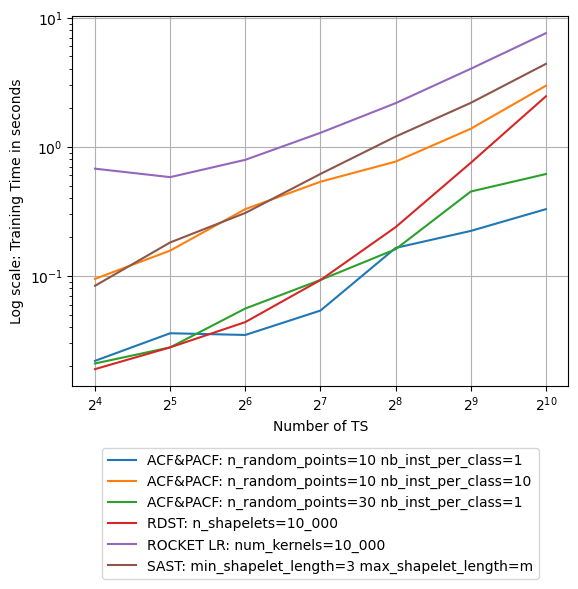

In [8]:

df_result["log_number_series"]=np.log2(df_result["number_series"])
#x_ticks=[5,6,7,8]
#df_result=df_result[df_result["log_number_series"].isin(x_ticks)]
df_result_pv=df_result.pivot_table(values="time_fit", index="log_number_series", columns="hyperparameter")
df_result_pv.plot.line(grid=True, xlabel="Number of TS", ylabel="Log scale: Training Time in seconds")


#place legend in center right of plot
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center')

# Define the custom formatter function
def exponent_of_2(x, pos):
    return r'$2^{{{}}}$'.format(int(x))

#plt.xticks(ticks=x_ticks, labels=x_ticks)

# Set the x-axis formatter as the custom formatter function
plt.gca().xaxis.set_major_formatter(FuncFormatter(exponent_of_2))
plt.yscale("log")  

In [16]:
df_result[df_result["hyperparameter"].isin(["ACF&PACF: n_random_points=10 nb_inst_per_class=10"])]
df_result[df_result["hyperparameter"].isin(["ROCKET LR: num_kernels=10_000"])]
df_result[df_result["hyperparameter"].isin(["SAST: min_shapelet_length=3 max_shapelet_length=m"])]
df_result[df_result["hyperparameter"].isin(["RDST: n_shapelets=10_000"])]

,Unnamed: 0,accuracy,time_fit,time_test,dataset_name,hyperparameter,rpoint,nb_per_class,classifier_name,number_series,log_number_series
6,6,0.970845,0.018950,0.014960,Chinatown,RDST: n_shapelets=10_000,0,0,RDST,16,4.0
13,13,0.976676,0.027938,0.026990,Chinatown,RDST: n_shapelets=10_000,0,0,RDST,32,5.0
20,20,0.982507,0.043857,0.062832,Chinatown,RDST: n_shapelets=10_000,0,0,RDST,64,6.0
27,27,0.982507,0.092762,0.110693,Chinatown,RDST: n_shapelets=10_000,0,0,RDST,128,7.0
34,34,0.982507,0.238363,0.219412,Chinatown,RDST: n_shapelets=10_000,0,0,RDST,256,8.0
41,41,0.982507,0.750991,0.449797,Chinatown,RDST: n_shapelets=10_000,0,0,RDST,512,9.0
48,48,0.982507,2.457402,0.555514,Chinatown,RDST: n_shapelets=10_000,0,0,RDST,1024,10.0
